VIII.11.5

Методами разных порядков аппроксимации численно решить 
систему Лоренца:
$$
\begin{cases}
x' = -\sigma*(x-y) \\
y' = -xz + rx -y \\
z' = xy-bz \\
x(0) = y(0) = z(0) = 1
\end{cases}
$$

при 
b = 8/3, $\sigma = 10$, r = 28. 
Считаем, что $0 < t \le 50. $
Объяснить полученные результаты.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import sympy as sp
from scipy.optimize import curve_fit
from mpl_toolkits import mplot3d
from matplotlib.animation import FuncAnimation

### 1) Методы Рунге-Кутта

Метод Рунге-Кутта четвертого порядка (RK4) является одним из самых популярных и эффективных методов численного решения обыкновенных дифференциальных уравнений.

Для системы Лоренца общая схема метода будет следующей:

$$
\begin{align}
k_1 &= h  f(tn, \mathbf{y}n) \\
k_2 &= h * f(tn + \frac{h}{2}, \mathbf{y}n + \frac{k_1}{2}) \\
k_3 &= h * f(tn + \frac{h}{2}, \mathbf{y}n + \frac{k_2}{2}) \\
k_4 &= h * f(tn + h, \mathbf{y}n + k_3) \\
\mathbf{y}{n+1} &= \mathbf{y}n + \frac{1}{6}(k_1 + 2*k_2 + 2*k_3 + k_4)
\end{align}
$$

где $\mathbf{y}n$ — вектор состояния системы на шаге $n$, $f$ — функция системы, $h$ — шаг по времени, $tn$ — текущее время.

In [3]:
def RungeKutta4(h, a, b, y_0, f):
    x = np.linspace(a, b, int((b - a) / h + 1))
    res = np.zeros(shape = (len(x), len(y_0)))

    res[0] = y_0

    for i in range(len(x) - 1):
        f_1 = f(x[i], res[i])
        f_2 = f(x[i] + 1 / 2 * h, res[i] + 1 / 2 * h * f_1)
        f_3 = f(x[i] + 1 / 2 * h, res[i] + 1 / 2 * h * f_2)
        f_4 = f(x[i] +         h, res[i] +         h * f_3)

        res[i + 1] = res[i] + h * (1 / 6 * f_1 + 
                                   2 / 6 * f_2 + 
                                   2 / 6 * f_3 + 
                                   1 / 6 * f_4)
        
    return res

In [4]:
h = 0.01
y_0 = np.array([0.5, 0.0, 0.0, 3 ** 0.5])

a = 0
b = 20

t = np.linspace(a, b, int((b - a) / h + 1))

x = RungeKutta4(h, a, b, y_0, f)

u0 = np.zeros(len(x))
u1 = np.zeros(len(x))

for i in range(len(x)):
    u0[i] = x[i][0]
    u1[i] = x[i][1]

print(u0, u1)

[ 0.5         0.49980003  0.49920053 ... -0.5587508  -0.56842301
 -0.57804383] [0.         0.0173182  0.03462256 ... 0.86452939 0.86399568 0.86338386]


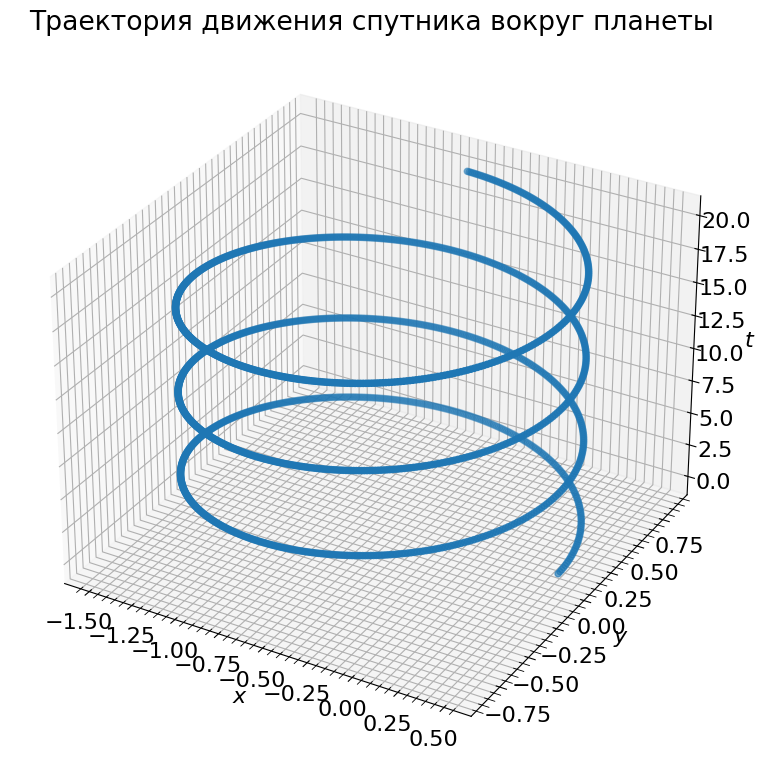

In [5]:
mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта 
plt.figure(figsize = (8,8)) # Создаем фигуру
plt.tight_layout()
ax = plt.axes(projection = '3d')

# Подписываем оси и график
ax.set_title(r"Траектория движения спутника вокруг планеты")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$t$");

ax.scatter3D(u0, u1, t)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()

ax.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
ax.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

ax.minorticks_on()
plt.show()

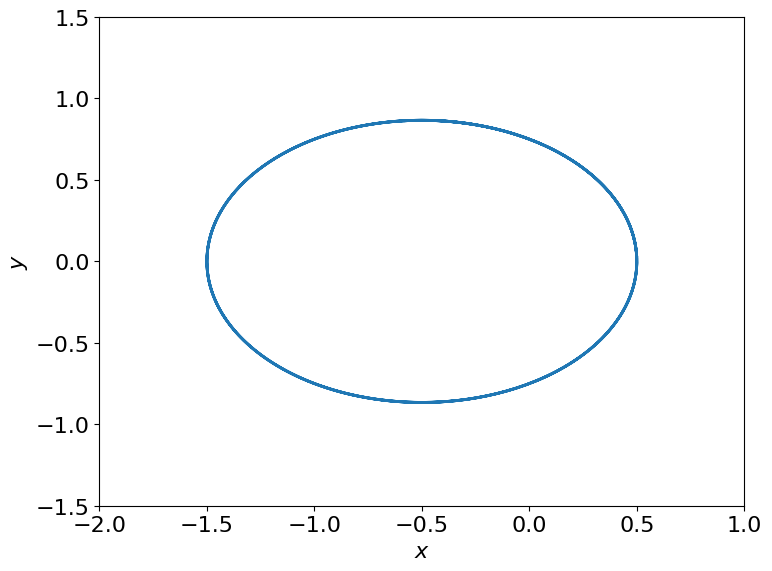

In [6]:
# plt.style.use('dark_background')
 
fig = plt.figure(figsize = (8,6))
ax = plt.axes(xlim=(-2, 1), ylim=(-1.5, 1.5))
line, = ax.plot([], [], lw=2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
plt.tight_layout()
 
# Функция инициализации.
def init():
    # создение пустого графа.
    line.set_data([], [])
    return line,

x = []
y = []
 
# функция анимации
def animate(i):
    # x, y данные на графике

    x.append(u0[2 * (i + 1)  % len(u0)]) 
    y.append(u1[2 * (i + 1)  % len(u0)]) 
    
    line.set_data(x, y)
    return line,

# Вызов анимации.
anim = FuncAnimation(fig, animate, init_func=init, frames=(len(u0) // 2), interval=1, blit=True)
anim.save('3.gif', writer='pillow')


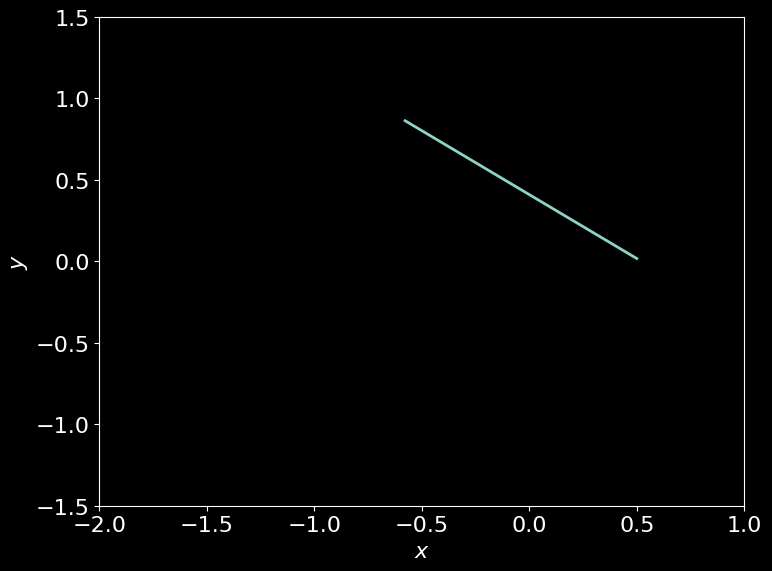

In [7]:
plt.style.use('dark_background')
 
fig = plt.figure(figsize = (8,6))
ax = plt.axes(xlim=(-2, 1), ylim=(-1.5, 1.5))
line, = ax.plot([], [], lw=2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
plt.tight_layout()
 
# Функция инициализации.
def init():
    # создение пустого графа.
    line.set_data([], [])
    return line,

x = []
y = []
 
# функция анимации
def animate(i):
    # x, y данные на графике

    x = [u0[2 * (i + 1)  % len(u0)], u0[2 * (i + 2)  % len(u0)]] 
    y = [u1[2 * (i + 1)  % len(u0)], u1[2 * (i + 2)  % len(u0)]] 
    
    line.set_data(x, y)
    return line,

# Вызов анимации.
anim = FuncAnimation(fig, animate, init_func=init, frames=(len(u0) // 2), interval=1, blit=True)
anim.save('2.gif', writer='pillow')


Метод сходится при $h \leq 0.3$

Воспользуемся явным методом Адамса 4-порядка:

$$
y_{l + 4} = y_{l + 3} + h \left(\frac{55}{44}f(x_{l+3}, y_{l+3}) - \frac{59}{24}f(x_{l+2}, y_{l+2}) + \frac{37}{24}f(x_{l+1}, y_{l+1}) - \frac{3}{8}f(x_{l}, y_{l}) \right)
$$

Начальные точки найдём с помощью классического метода Рунге-Кутты 4-порядка

In [8]:
def Adams4(h, a, b, y_0, f):
    k = int((b - a) / h + 1)

    if (k < 5): 
        return np.array([])

    x = np.linspace(a, b, k)
    res = np.zeros(shape = (len(x), len(y_0)))

    init_cond = RungeKutta4(h, a, b, y_0, f)

    res[0] = init_cond[0]
    res[1] = init_cond[1]
    res[2] = init_cond[2]
    res[3] = init_cond[3]

    for i in range(len(x) - 4):
        f_0 = f(x[i],     res[i])
        f_1 = f(x[i + 1], res[i + 1])
        f_2 = f(x[i + 2], res[i + 2])
        f_3 = f(x[i + 3], res[i + 3])

        res[i + 4] = res[i + 3] + h * (+ 55 / 24 * f_3 
                                       - 59 / 24 * f_2 
                                       + 37 / 24 * f_1 
                                       -  3 /  8 * f_0)
    return res

In [9]:
h = 0.05
y_0 = np.array([0.5, 0.0, 0.0, 3 ** 0.5])

a = 0
b = 20

t = np.linspace(a, b, int((b - a) / h + 1))

x = Adams4(h, a, b, y_0, f)

u0 = np.zeros(len(x))
u1 = np.zeros(len(x))

for i in range(len(x)):
    u0[i] = x[i][0]
    u1[i] = x[i][1]

print(u0, u1)

[ 5.00000000e-01  4.95020733e-01  4.80325060e-01  4.56595837e-01
  4.24889721e-01  3.86380997e-01  3.42230262e-01  2.93653880e-01
  2.41691263e-01  1.87280573e-01  1.31189270e-01  7.40614482e-02
  1.64123732e-02 -4.13440136e-02 -9.88799682e-02 -1.55936672e-01
 -2.12311034e-01 -2.67844278e-01 -3.22412937e-01 -3.75921629e-01
 -4.28297259e-01 -4.79484466e-01 -5.29441973e-01 -5.78139703e-01
 -6.25556479e-01 -6.71678195e-01 -7.16496347e-01 -7.60006866e-01
 -8.02209178e-01 -8.43105444e-01 -8.82699959e-01 -9.20998653e-01
 -9.58008697e-01 -9.93738184e-01 -1.02819587e+00 -1.06139094e+00
 -1.09333288e+00 -1.12403131e+00 -1.15349585e+00 -1.18173609e+00
 -1.20876145e+00 -1.23458118e+00 -1.25920425e+00 -1.28263938e+00
 -1.30489494e+00 -1.32597898e+00 -1.34589920e+00 -1.36466291e+00
 -1.38227705e+00 -1.39874815e+00 -1.41408236e+00 -1.42828543e+00
 -1.44136267e+00 -1.45331903e+00 -1.46415903e+00 -1.47388677e+00
 -1.48250596e+00 -1.49001990e+00 -1.49643147e+00 -1.50174318e+00
 -1.50595708e+00 -1.50907

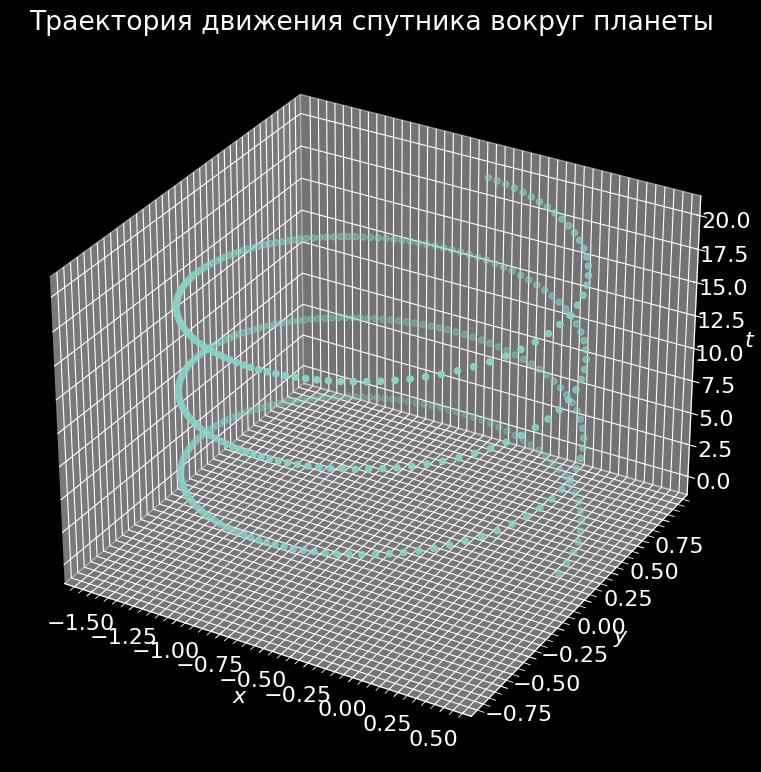

In [10]:
mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта 
plt.figure(figsize = (8,8)) # Создаем фигуру
plt.tight_layout()
ax = plt.axes(projection = '3d')

# Подписываем оси и график
ax.set_title(r"Траектория движения спутника вокруг планеты")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$t$");

ax.scatter3D(u0, u1, t)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()

ax.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
ax.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

ax.minorticks_on()
plt.show()

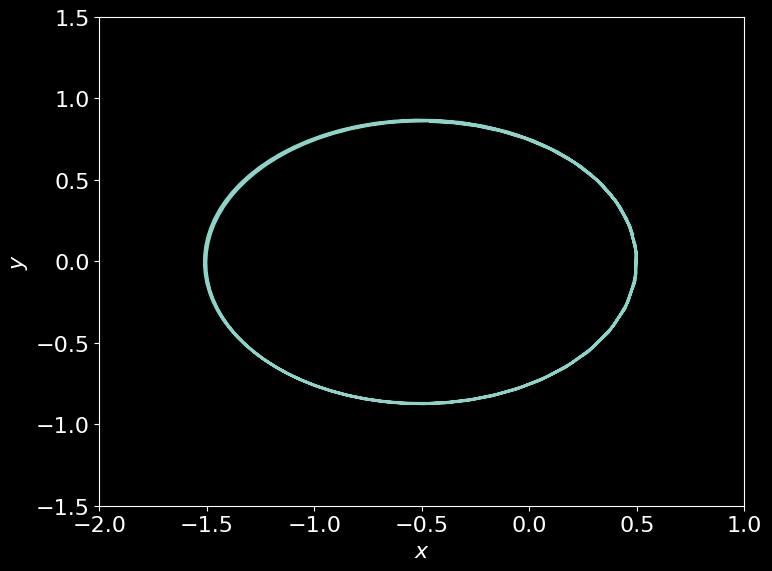

In [11]:
# plt.style.use('dark_background')
 
fig = plt.figure(figsize = (8,6))
ax = plt.axes(xlim=(-2, 1), ylim=(-1.5, 1.5))
line, = ax.plot([], [], lw=2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
plt.tight_layout()
 
# Функция инициализации.
def init():
    # создение пустого графа.
    line.set_data([], [])
    return line,

x = []
y = []
 
# функция анимации
def animate(i):
    # x, y данные на графике

    x.append(u0[2 * (i + 1)  % len(u0)]) 
    y.append(u1[2 * (i + 1)  % len(u0)]) 
    
    line.set_data(x, y)
    return line,

# Вызов анимации.
anim = FuncAnimation(fig, animate, init_func=init, frames=(len(u0) // 2), interval=1, blit=True)
anim.save('4.gif', writer='pillow')


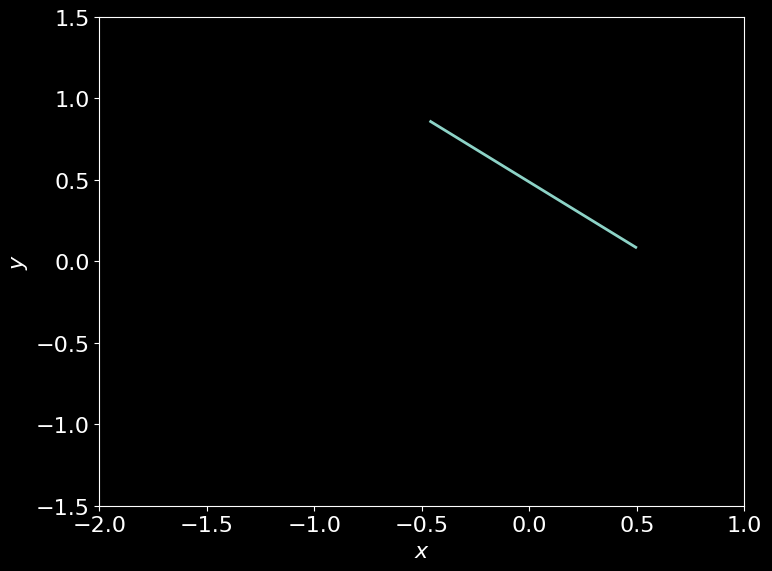

In [12]:
plt.style.use('dark_background')
 
fig = plt.figure(figsize = (8,6))
ax = plt.axes(xlim=(-2, 1), ylim=(-1.5, 1.5))
line, = ax.plot([], [], lw=2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
plt.tight_layout()
 
# Функция инициализации.
def init():
    # создение пустого графа.
    line.set_data([], [])
    return line,

x = []
y = []
 
# функция анимации
def animate(i):
    # x, y данные на графике

    x = [u0[2 * (i + 1)  % len(u0)], u0[2 * (i + 2)  % len(u0)]] 
    y = [u1[2 * (i + 1)  % len(u0)], u1[2 * (i + 2)  % len(u0)]] 
    
    line.set_data(x, y)
    return line,

# Вызов анимации.
anim = FuncAnimation(fig, animate, init_func=init, frames=(len(u0) // 2), interval=1, blit=True)
anim.save('5.gif', writer='pillow')

Многошаговый метод Адамса сходится при $h \leq 0.05$